In [50]:
from astropy.table import Table
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Path to the .tbl file
file_path = 'Table.tbl'

# Read using Astropy
table = Table.read(file_path, format='ascii')

# Convert to pandas DataFrame
df = table.to_pandas()
# dopr empty columns
df.drop(axis=1, columns=df.columns[df.isnull().all()], inplace=True)

In [43]:
print(df.shape)
df.describe()

(972, 204)


,slice,Saturated,J.D.-2400000,JD_UTC,BJD_TDB,EXPTIME,FWHM_Mean,Source_Radius,FWHM_Mult,Source_Rad(base),...,N_Src_Pixels_C5,N_Sky_Pixels_C5,N_Src_Pixels_C6,N_Sky_Pixels_C6,N_Src_Pixels_C7,N_Sky_Pixels_C7,N_Src_Pixels_C8,N_Sky_Pixels_C8,N_Src_Pixels_C9,N_Sky_Pixels_C9
count,972.000000,972.0,972.000000,9.720000e+02,972.0,972.0,972.000000,972.000000,9.720000e+02,972.000000,...,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,486.500000,0.0,59820.258025,2.459820e+06,0.0,15.0,5.198328,9.424614,1.400000e+00,10.639441,...,11.270992,3.895062,11.270992,3.908436,11.270992,3.852881,11.270992,3.881687,11.270992,3.886831
std,280.736531,0.0,0.058472,5.847153e-02,0.0,0.0,0.668985,1.088070,2.221589e-16,0.001646,...,62.073925,20.171083,62.073925,20.241764,62.073925,19.988770,62.073925,20.103629,62.073925,20.128566
min,1.000000,0.0,59820.154635,2.459820e+06,0.0,15.0,3.918615,7.718667,1.400000e+00,10.639123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.750000,0.0,59820.206649,2.459820e+06,0.0,15.0,4.748767,8.738530,1.400000e+00,10.639123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,486.500000,0.0,59820.257031,2.459820e+06,0.0,15.0,5.078623,9.220901,1.400000e+00,10.639123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.250000,0.0,59820.306918,2.459820e+06,0.0,15.0,5.535977,9.845130,1.400000e+00,10.639123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,972.000000,0.0,59820.360804,2.459820e+06,0.0,15.0,10.953345,22.051167,1.400000e+00,10.647956,...,822.562327,114.000000,822.562327,115.000000,822.562327,117.000000,822.562327,114.000000,822.562327,115.000000


In [44]:
# Step 1: Make a copy of original dataframe
df_clean = df.copy()

# Step 2: Convert JD columns to datetime using astropy
if 'JD_UTC' in df_clean.columns:
    df_clean['JD_UTC_datetime'] = Time(df_clean['JD_UTC'], format='jd').to_datetime()

if 'J.D.-2400000' in df_clean.columns:
    df_clean['JD_datetime'] = Time(df_clean['J.D.-2400000'] + 2400000, format='jd').to_datetime()

# Step 3: Normalize all relevant numeric fields
# Define columns to exclude from normalization
exclude_cols = [
    'Label', 'slice', 'Saturated',
    'J.D.-2400000', 'JD_UTC', 'JD_SOBS', 'HJD_UTC', 'BJD_TDB',
    'JD_UTC_datetime', 'JD_datetime'
]

# Automatically find all numeric columns
# Step 1: Identify numeric columns
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()

# Step 2: Exclude time and ID-related columns
exclude_cols = ['J.D.-2400000', 'JD_UTC', 'JD_SOBS', 'HJD_UTC', 'BJD_TDB', 
                'slice', 'Saturated']
normalize_cols = [col for col in numeric_cols if col not in exclude_cols]

# Step 3: Apply min-max normalization
for col in normalize_cols:
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    if min_val != max_val:  # Avoid divide-by-zero
        df_clean[col] = (df_clean[col] - min_val) / (max_val - min_val)

df_clean.describe()
print(df.columns.tolist())

['Label', 'slice', 'Saturated', 'J.D.-2400000', 'JD_UTC', 'BJD_TDB', 'EXPTIME', 'FWHM_Mean', 'Source_Radius', 'FWHM_Mult', 'Source_Rad(base)', 'Sky_Rad(min)', 'Sky_Rad(max)', 'rel_flux_T1', 'rel_flux_C2', 'rel_flux_C3', 'rel_flux_C4', 'rel_flux_C5', 'rel_flux_C6', 'rel_flux_C7', 'rel_flux_C8', 'rel_flux_C9', 'rel_flux_err_T1', 'rel_flux_err_C2', 'rel_flux_err_C3', 'rel_flux_err_C4', 'rel_flux_err_C5', 'rel_flux_err_C6', 'rel_flux_err_C7', 'rel_flux_err_C8', 'rel_flux_err_C9', 'rel_flux_SNR_T1', 'rel_flux_SNR_C2', 'rel_flux_SNR_C3', 'rel_flux_SNR_C4', 'rel_flux_SNR_C5', 'rel_flux_SNR_C6', 'rel_flux_SNR_C7', 'rel_flux_SNR_C8', 'rel_flux_SNR_C9', 'tot_C_cnts', 'tot_C_err', 'X(IJ)_T1', 'Y(IJ)_T1', 'X(FITS)_T1', 'Y(FITS)_T1', 'Source-Sky_T1', 'N_Src_Pixels_T1', 'Source_Error_T1', 'Source_SNR_T1', 'Peak_T1', 'Mean_T1', 'Sky/Pixel_T1', 'N_Sky_Pixels_T1', 'FWHM_T1', 'Width_T1', 'X-Width_T1', 'Y-Width_T1', 'Angle_T1', 'Roundness_T1', 'X(IJ)_C2', 'Y(IJ)_C2', 'X(FITS)_C2', 'Y(FITS)_C2', 'Source-S

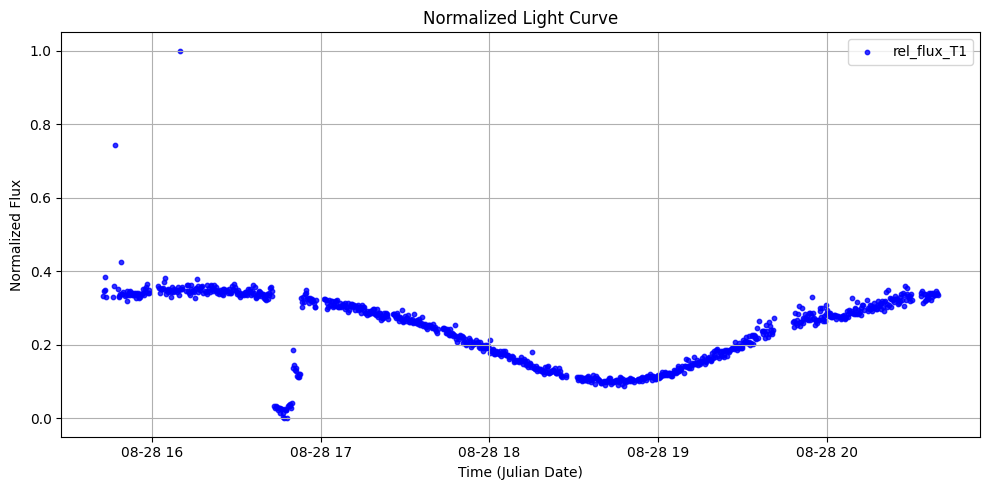

In [45]:
def plot_light_curve(df, time_col='JD_datetime', flux_col='rel_flux_T1', title=None):
    """
    Plot a light curve using a normalized DataFrame.

    Parameters:
    - df: pandas DataFrame (normalized, with time and flux columns)
    - time_col: column name for time (default: 'JD_datetime')
    - flux_col: column name for normalized flux (default: 'rel_flux_T1')
    - title: optional plot title
    """
    if time_col not in df.columns or flux_col not in df.columns:
        print(f"Missing column: {time_col} or {flux_col}")
        return

    plt.figure(figsize=(10, 5))
    plt.scatter(df[time_col], df[flux_col], s=10, alpha=0.8, color='blue', label=flux_col)
    plt.xlabel("Time (Julian Date)")
    plt.ylabel("Normalized Flux")
    plt.title(title or f"Light Curve: {flux_col} vs Time")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_light_curve(df_clean, title="Normalized Light Curve")

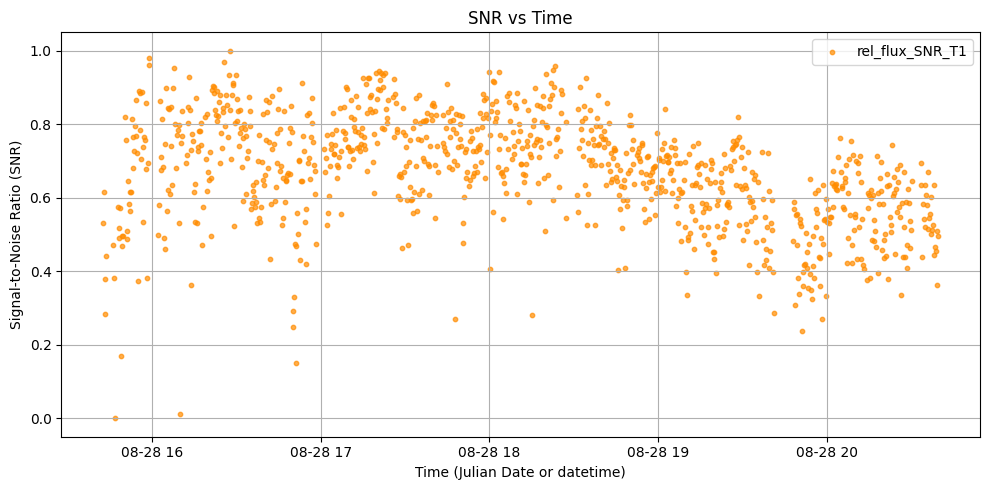

In [46]:
def plot_snr_vs_time_T(df, snr_col='rel_flux_SNR_T1', time_col='JD_datetime', title=None):
    """
    Plot SNR vs Time as a scatter plot.

    Parameters:
    - df: pandas DataFrame
    - snr_col: column name containing SNR values
    - time_col: column name containing time values (e.g., JD_datetime)
    - title: optional plot title
    """
    if snr_col not in df.columns or time_col not in df.columns:
        print(f"Column '{snr_col}' or '{time_col}' not found in DataFrame.")
        return

    plt.figure(figsize=(10, 5))
    plt.scatter(df[time_col], df[snr_col], s=10, alpha=0.7, color='darkorange', label=snr_col)
    plt.xlabel("Time (Julian Date or datetime)")
    plt.ylabel("Signal-to-Noise Ratio (SNR)")
    plt.title(title or f"SNR Scatter Plot: {snr_col}")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_snr_vs_time_T(df_clean, title="SNR vs Time")


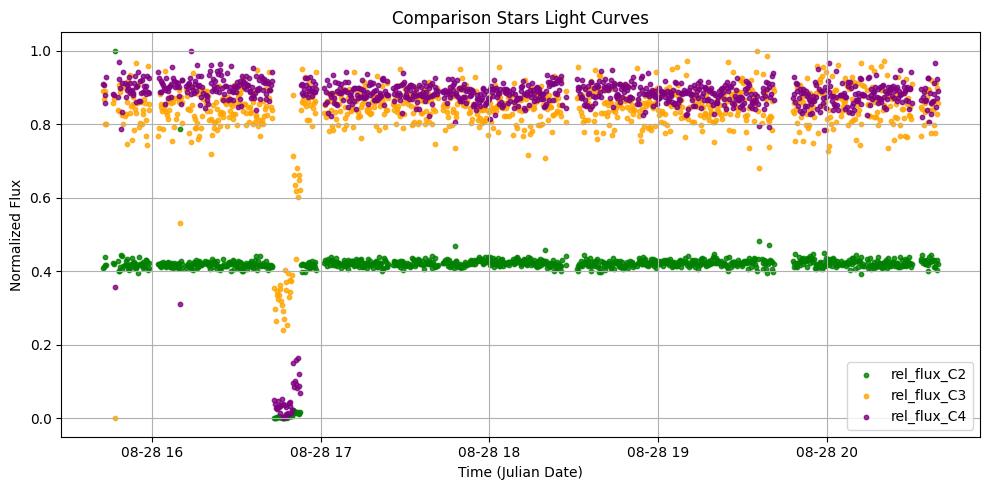

In [47]:
def plot_light_curve_C(df, time_col='JD_datetime', flux_cols=None, title=None):
    """
    Plot light curves of multiple flux columns on the same plot.

    Parameters:
    - df: pandas DataFrame
    - time_col: column name for time
    - flux_cols: list of flux column names to plot
    - title: optional plot title
    """
    if time_col not in df.columns:
        print(f"Missing time column: {time_col}")
        return

    if flux_cols is None:
        flux_cols = ['rel_flux_C2', 'rel_flux_C3', 'rel_flux_C4']  # default

    missing = [col for col in flux_cols if col not in df.columns]
    if missing:
        print(f"Missing flux columns: {missing}")
        return

    plt.figure(figsize=(10, 5))

    colors = ['green', 'orange', 'purple']
    for flux_col, color in zip(flux_cols, colors):
        plt.scatter(df[time_col], df[flux_col], s=10, alpha=0.8, label=flux_col, color=color)

    plt.xlabel("Time (Julian Date)")
    plt.ylabel("Normalized Flux")
    plt.title(title or "Light Curves of Comparison Stars")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_light_curve_C(df_clean, title="Comparison Stars Light Curves")